In [ ]:
!nvidia-smi

Fri Oct  4 04:32:32 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!pip install ultralytics
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.7/881.7 kB 29.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.4/80.4 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.6 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [ ]:
from ultralytics import YOLO
from roboflow import Roboflow

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
rf = Roboflow(api_key="VkBlnlf98T6zhJtc0MCa")
project = rf.workspace("project-1-kjyv0").project("project-pdi")
version = project.version(2)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.3.4, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Project-PDI-2 in yolov8:: 100%|██████████| 15452/15452 [00:03<00:00, 4161.76it/s]


In [ ]:
!yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=20 imgsz=640

Ultralytics 8.3.4 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/Project-PDI-2/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show

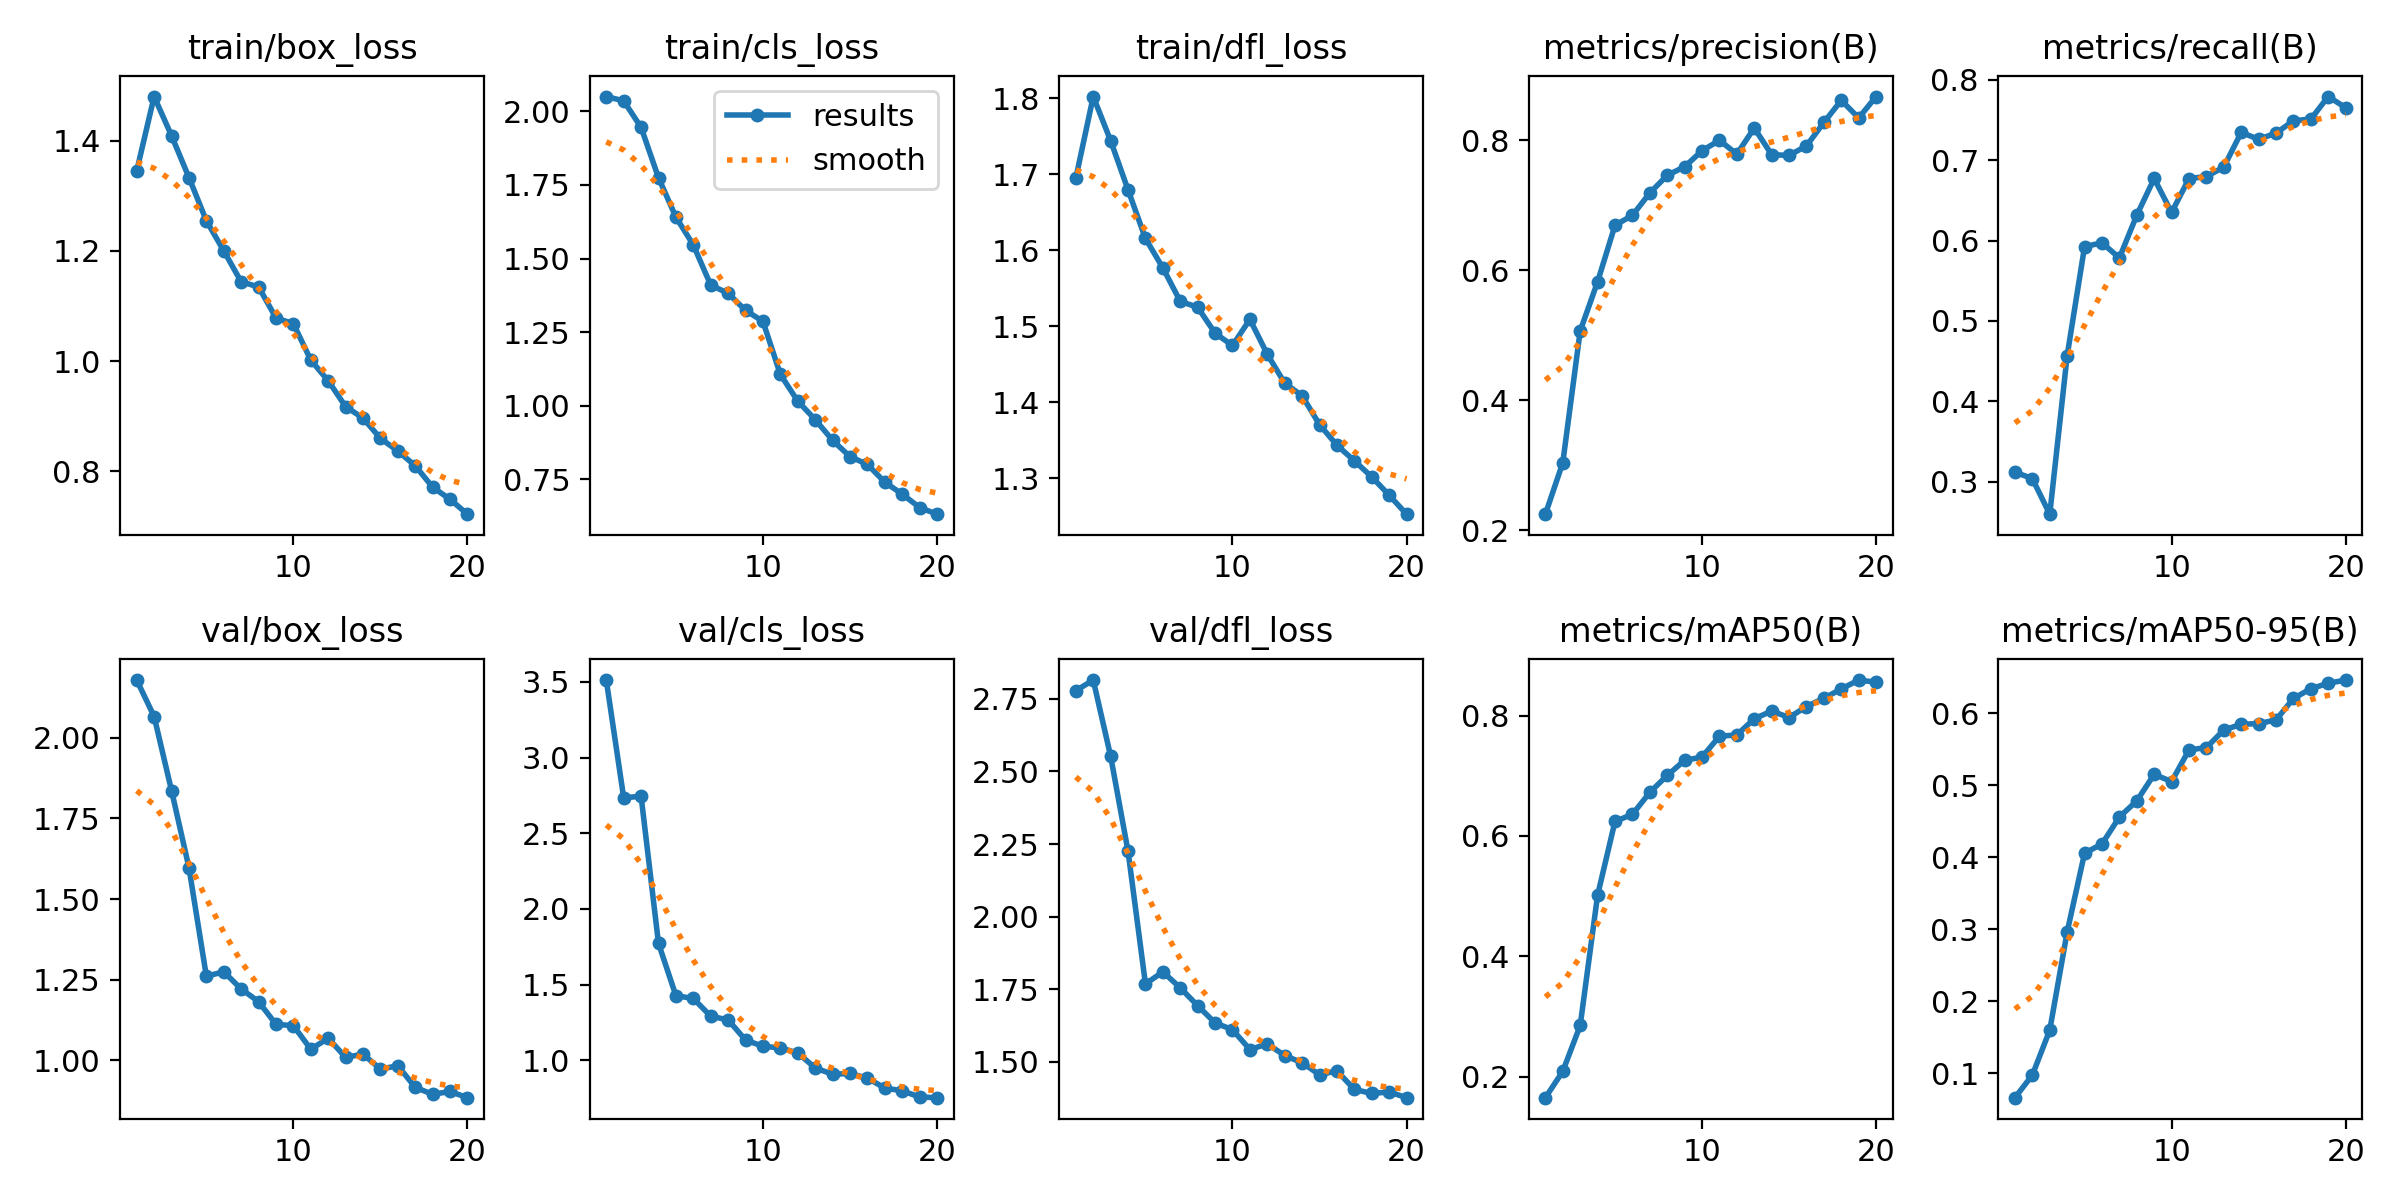

In [ ]:
from IPython.display import Image

Image(filename=f'/content/runs/detect/train/results.png', width=700)

In [ ]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics YOLOv8.2.101 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/Project-PDI-1/valid/labels.cache... 578 images, 0 backgrounds, 0 corrupt: 100% 578/578 [00:00<?, ?it/s]
val: WARNING ⚠️ /content/Project-PDI-1/valid/images/knife_12_15_png_jpg.rf.a34b2d5c3ca89cf9c0297b52660a22fa.jpg: 2 duplicate labels removed
val: WARNING ⚠️ /content/Project-PDI-1/valid/images/knife_12_23_png_jpg.rf.76dee77ef374ba22ce98e764659d93b1.jpg: 2 duplicate labels removed
val: WARNING ⚠️ /content/Project-PDI-1/valid/images/knife_12_24_png_jpg.rf.6a44a3595dce7f22d5528c2c96f7e723.jpg: 2 duplicate labels removed
val: WARNING ⚠️ /content/Project-PDI-1/valid/images/knife_12_32_png_jpg.rf.adc7873a4941f1d76610bb1ea05b9d35.jpg: 2 duplicate labels removed
val: WARNING ⚠️ /content/Project-PDI-1/valid/images/knife_12_6_png_jpg.rf.0fc601cd3c76e748ae1b4751868d9b72.jpg: 2 duplicate labels removed
val

In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt source={dataset.location}/test/images conf=0.5

Ultralytics YOLOv8.2.101 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs

image 1/148 /content/Project-PDI-1/test/images/2_6_jpg.rf.ba859520efef34213bc5af51ed459bcd.jpg: 640x640 1 knife, 38.0ms
image 2/148 /content/Project-PDI-1/test/images/3_31_jpg.rf.04d28352fb5d963ee8332a6987f0ebce.jpg: 640x640 4 knifes, 37.0ms
image 3/148 /content/Project-PDI-1/test/images/3_39_jpg.rf.71f3b56f66bd843a8a80e98c8c5de535.jpg: 640x640 3 knifes, 37.0ms
image 4/148 /content/Project-PDI-1/test/images/3_60_jpg.rf.8afd9df065eee05671bf90f47500da26.jpg: 640x640 1 knife, 36.9ms
image 5/148 /content/Project-PDI-1/test/images/4_2_jpg.rf.d4153b92361bbcb5d2c20bd46f2789ac.jpg: 640x640 1 knife, 37.0ms
image 6/148 /content/Project-PDI-1/test/images/5_14_jpg.rf.596b0fbc2730f98ff00f98b58ad17476.jpg: 640x640 1 knife, 26.7ms
image 7/148 /content/Project-PDI-1/test/images/5_48_jpg.rf.9b7598f0796bc82977e04eb8f5bf5121.jpg: 640x6

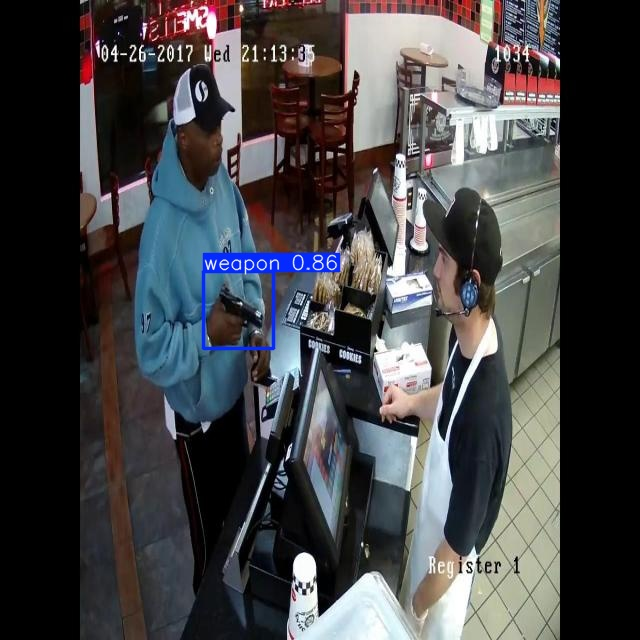

In [ ]:
Image(filename=f'/content/runs/detect/predict/V1-frame-1080_jpg.rf.17cac1497ff85882f0b6fe31b55353b1.jpg', width=700)